# | SDA - Project - Introduction |

In this project, we aim to analyze the prepaid plans offered by Megaline, a telecom operator, to understand which plan generates higher revenue. Megaline offers two distinct prepaid plans—Surf and Ultimate—each with specific monthly allowances and pricing structures for calls, text messages, and data usage. The company is looking to make informed decisions regarding its advertising budget based on the revenue generated from each plan.

## Stages
The files below contain detailed data on user demographics, call logs, text messages, internet usage, and plan details. The primary objective is to compare the average monthly revenue generated by each plan and identify key differences in user behavior. I will use this data to accomplish my tasks in four stages:

1. **Data overview:** there are multiple datasets, that are not ready to go as is.  I will be utilizing arguments that will allow me to properly access the data.
2. **Preprocessing:** Cleaning and preprocessing the data to ensure accuracy.
3. **Analysis:** Calculating the revenue generated by each plan based on the users' monthly consumption and overage charges.
4. **Hypothesize:** Formulating and testing hypotheses to determine if there are statistically significant differences in average revenue between the plans and across different regions.


# Stage 1: Data overview 
- Here I will open the datasets for use in the project. First though, I must import all necessary python libraries. This will allow me to use multiple different helpful methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in DataFrame: | users_df |

- Brief description of the different columns:<br><br>
 - **user_id:**&nbsp;&nbsp;A unique identifier for each user in the dataset. This column is used to link users with their respective records in other tables (such as calls, messages, and internet usage).<br><br>
 - **first_name:** The first name of the user.<br><br>
 - **last_name:** The last name of the user.<br><br>
 - **age:** The age of the user in years.<br><br>
 - **reg_date:** The date when the user subscribed to the Megaline service. It’s generally represented in a dd-mm-yyyy format.<br><br>
 - **churn_date:** The date when the user stopped using the service. If this value is missing, it indicates that the user was still an active subscriber at the time the data was extracted.<br><br>
 - **city:** The city in which the user resides. This can be used to segment users by geographical region and perform region-based analysis.<br><br>
 - **plan:** The name of the prepaid plan that the user is subscribed to, which can be either "Surf" or "Ultimate".<br><br>
- This Data set is the user deomgraphics and plan information. What we can gather from this dataframe when we call info() on it is that most users, all but 34 out of 500, are still active customers.

In [2]:
users_df = pd.read_csv('/datasets/megaline_users.csv')
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [3]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Reading in DataFrame: | calls_df |

- Brief description of the different columns:<br><br>
 - **id:** A unique identifier for each call entry. This serves as the primary key for each record in the dataset.<br><br>
 - **call_date:** The date on which the call was made. This column indicates the specific day of the call and will likely need to be converted to a datetime format for time-based analysis.<br><br>
 - **duration:** The length of the call in minutes. Megaline rounds up call durations to the next minute, even if the call lasted only a few seconds.<br><br>
 - **user_id:** A unique identifier for the user who made the call. This column is used to link the call records to the users in the megaline_users.csv DataFrame.<br><br>       
- This data set details user call records.

In [4]:
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


## Reading in DataFrame: | messages_df |

- Brief description of the different columns:<br><br>
 - **id:** A unique identifier for each text message record. This serves as the primary key for each message entry.<br><br>
 - **message_date:** The date when the text message was sent. This column records the specific day a message was sent and may need to be converted to a datetime format for analysis involving dates.<br><br>
 - **user_id:** A unique identifier for the user who sent the text message. This column is used to link the message records to users in the megaline_users.csv DataFrame.<br><br>
- This data set details user text message records.

In [6]:
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [7]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


## Reading in DataFrame: | internet_df |

- Brief description of the different columns:<br><br>
 - **id:** A unique identifier for each internet session record. This serves as the primary key for each session entry.<br><br>
 - **mb_used:** The volume of data used during the internet session, measured in megabytes. This column represents the amount of internet data consumed by the user in a single session.<br><br>
 - **session_date:** The date on which the internet session took place. This column indicates the specific day of the session and may need to be converted to a datetime format for time-based analysis.<br><br>
 - **user_id:** A unique identifier for the user who consumed the internet data. This column is used to link the internet usage records to the users in the megaline_users.csv DataFrame.<br><br>       
- This data set details user internet usage records.

In [8]:
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [9]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


## Reading in DataFrame: | plans_df |

- Brief description of the different columns:<br><br>
 - **messages_included:** The number of text messages included per month in the plan. This is the limit for text messages that a user can send without additional charges.<br><br>
 - **mb_per_month_included:** The amount of internet data included per month in megabytes. This indicates the data limit for users before they incur extra charges.<br><br> 
 - **minutes_included:** The number of call minutes included per month in the plan. This represents the maximum number of minutes that a user can use without incurring extra charges.<br><br>
 - **usd_monthly_pay:** The fixed monthly charge for the plan in US dollars. This is the base cost of subscribing to the plan without considering overage charges.<br><br>
 - **usd_per_gb:** The cost per additional gigabyte of internet data once the included data limit is exceeded. This is calculated in gigabytes (1 GB = 1024 MB) and indicates the charge applied for every additional gigabyte of data used.<br><br>
 - **usd_per_message:** The cost per additional text message once the included messages are exceeded. This is the charge applied for every extra text message sent beyond the plan limit.<br><br>
 - **usd_per_minute:** The cost per additional minute of call time once the included minutes are exceeded. This is the charge applied for every extra minute used.<br><br>
 - **plan_name:** The name of the prepaid plan. This column indicates the specific plan that users are subscribed to, such as "Surf" or "Ultimate".<br><br>        
- This data set details information on prepaid plans.

In [10]:
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [11]:
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


## Stage 1 Conclusion
- In this stage we have successfully read in all of the DataFrames as well all neccessary python libraries.

# Stage 2: Preprocessing
   - Moving forward, I will deal with any duplicated and missing values.  Additionally, I will fix any other obvious issues.

## | plans_df |
   - This is a pretty small data frame.  All data can be displayed and easily viewed by simply printing it. One thing that should be fixed is the 'mb_per_month_included' column.  It should be 'gb_per_month_included':<br><br>
       - Customers tend to think of internet usage in terms of GBs, not MBs.  
       - Additionally, it would just be more consistent, because a few columns over, the extra internet data column is denoted in terms of GBs.
    

In [12]:
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [13]:
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


- Converting the 'mb_per_month_column' to Gigabytes will allow for more consistent comparison between included data and extra data.

In [14]:
# Dividing the values in the column by 1024 to represent GBs instead of MBs.
plans_df['mb_per_month_included'] = plans_df['mb_per_month_included'] / 1024

# Renaming the column
plans_df = plans_df.rename(columns={'mb_per_month_included': 'gb_per_month_included'})

# Converting it back to int64
plans_df['gb_per_month_included'] = plans_df['gb_per_month_included'].astype('int64')

plans_df

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


In [15]:
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


- *Here is a summary of everything completed in this section:*
    - <i>**Converted 'mb_per_month_included' to Gigabytes:** I divided the mb_per_month_included column values by 1024 to convert the included data allowance from megabytes to gigabytes. This conversion ensures consistency in comparisons since other data usage values are expressed in gigabytes.
    - <i>**Renamed the Column:** I renamed the column 'mb_per_month_included' to 'gb_per_month_included' to better reflect its new contents. This helps in maintaining clarity and accuracy in the DataFrame.
    - <i>**Converted the Data Type Back to Integer:** After converting the values to gigabytes, I changed the column’s data type from float to ' int64 ' to remove any decimal points and reflect the new values as whole numbers (gigabytes).

## | users_df |
   - Everything seems to be in order when calling .info() on the dataframe.  However, there are a few things worth noting, and will likely be fixed:<br><br>
       - All but 34 values in the 'churn_date' column are NaN value. I don't forsee this being an issue in analysis, but if it complicates things later, I'll come back and change it.
       - The 'reg_date' and 'churn_date' columns appear to be in a string format. For better handling of date-based analysis, I will convert these to datetime format.
       - The 'city' column has a ton of information in it. It would be beneficial to have the city and state information in seperate columns.
       - Finally I will check for any duplicated values. In the 'user_id' column specifically

In [16]:
users_df.sample(5) # Here is the information as it stands now.  This will likely look a lot different by the end of this section.            

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
74,1074,Particia,Fuller,69,"Knoxville, TN MSA",2018-11-26,ultimate,NaN
29,1029,Franklyn,Henson,59,"Tampa-St. Petersburg-Clearwater, FL MSA",2018-01-05,surf,NaN
34,1034,Jc,Gentry,22,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-13,surf,NaN
486,1486,Sang,Solis,29,"Orlando-Kissimmee-Sanford, FL MSA",2018-12-05,surf,NaN
418,1418,Hal,Barnes,40,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-19,surf,NaN


In [17]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [18]:
# Changing the 'reg_date' column type to datetime.
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])

# Changing the 'churn_date' column type to datetime.
users_df['churn_date'] = pd.to_datetime(users_df['churn_date']) 

In [19]:
# Extracting just the city information from the 'city' column.
users_df['core_city'] = users_df['city'].str.split(',').str[0]

# Extracting just the state information from the 'city' column.
users_df['state'] = users_df['city'].str.split(',').str[1].str.strip().str.split(' ').str[0]

# Now that I have the city and state information in their own seperate columns, I can drop the original column.
users_df.drop(columns=['city'], inplace=True)

#renaming
users_df = users_df.rename(columns={'core_city': 'city'})

# Now that looks a lot better.  The city and state information are now in their own columns at the end.
users_df.head()

,user_id,first_name,last_name,age,reg_date,plan,churn_date,city,state
0,1000,Anamaria,Bauer,45,2018-12-24,ultimate,NaT,Atlanta-Sandy Springs-Roswell,GA
1,1001,Mickey,Wilkerson,28,2018-08-13,surf,NaT,Seattle-Tacoma-Bellevue,WA
2,1002,Carlee,Hoffman,36,2018-10-21,surf,NaT,Las Vegas-Henderson-Paradise,NV
3,1003,Reynaldo,Jenkins,52,2018-01-28,surf,NaT,Tulsa,OK
4,1004,Leonila,Thompson,40,2018-05-23,surf,NaT,Seattle-Tacoma-Bellevue,WA


In [20]:
# Reordering the columns for easier information consumption.
new_column_order = ['user_id', 'first_name', 'last_name', 'age', 'city', 'state', 'plan', 'reg_date', 'churn_date',]
users_df = users_df[new_column_order]
# From a sample, we can see that the information is now in an easier to digest order.
# Additionally, Having the extra 'state' column will allow for more effective analysis.
users_df.sample(5)

,user_id,first_name,last_name,age,city,state,plan,reg_date,churn_date
38,1038,Olympia,Velazquez,32,Nashville-Davidson–Murfreesboro–Franklin,TN,ultimate,2018-06-25,NaT
292,1292,Cassey,French,42,Dallas-Fort Worth-Arlington,TX,surf,2018-01-27,NaT
449,1449,Boyd,Kelley,39,Seattle-Tacoma-Bellevue,WA,surf,2018-10-04,NaT
357,1357,Ria,Beach,61,Baton Rouge,LA,surf,2018-05-30,NaT
461,1461,Rupert,Santana,54,Pittsburgh,PA,surf,2018-09-14,NaT


In [21]:
users_df.info() # We can now see that the all columns are now the appropriate type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   state       500 non-null    object        
 6   plan        500 non-null    object        
 7   reg_date    500 non-null    datetime64[ns]
 8   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 35.3+ KB


In [22]:
# There are no duplicates in the 'user_id' column.
duplicates = users_df['user_id'].duplicated().sum()
duplicates 

0

- *Here is a summary of everything completed in this section:*
    - <i>**Converted Date Columns to Datetime Format:** To improve handling of date-based analysis, I converted the reg_date and churn_date columns from string format to datetime format.
    - <i>**Extracted City and State Information:** The city column contained both city and state information, so I split it into two separate columns.
    - <i>**Reordered Columns for Better Readability:** To make the DataFrame easier to read and analyze, I reordered the columns.
    - <i>**Checked for Duplicates:** Verified that there were no duplicate entries based on the user_id column.

## | calls_df |
   - There are some potential changes to this dataframe that may be helpful:<br><br>
       - Converting the 'call_date' column to datetime format.
       - <i>If needed, I could filter out 0 values in the 'duration' column.
       - Since customers are billed for a minute as soon as it starts, it would be helpful to convert the 'duration' column to 'int64'. This will round all values up automatically.
       - Like always, check for duplicate rows.

In [23]:
calls_df.sample(5)

,id,user_id,call_date,duration
132383,1476_334,1476,2018-10-21,14.29
31951,1120_354,1120,2018-11-06,8.72
102034,1362_796,1362,2018-07-12,4.11
858,1004_385,1004,2018-05-24,11.27
61342,1221_149,1221,2018-12-26,5.72


In [24]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [25]:
# Convert 'call_date' to datetime format.
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

# Rounded the 'duration' column up using 'np.ceil', then converted it to 'int64'.
calls_df['duration'] = np.ceil(calls_df['duration']).astype(int)

In [26]:
# Checking for any fully duplicate rows.
duplicates = calls_df.duplicated().sum()
duplicates

0

In [27]:
# 'call_date' column changed to datetime format.
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


In [28]:
# I rounded up using 'np.ceil', then changed 'duration' column to 'int64' type.
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


- *Here is a summary of everything completed in this section:*
    - <i>**Converted Date Columns to Datetime Format:** To improve handling of date-based analysis, I converted the call_date column from string format to datetime format.
    - <i>**Converted 'duration' column:** This makes it easier to deal with wole numbers if billing or analysis requires it.
    - <i>**Checked for Duplicates:** Verified that there were no fully duplicate rows.

## | messages_df |
   - Only some routine changes need to be made:<br><br>
       - Converting the 'message_date' column to datetime format.
       - Once again, check for duplicate rows.

In [29]:
messages_df.sample(5)

,id,user_id,message_date
68044,1439_438,1439,2018-06-01
31590,1196_73,1196,2018-04-19
51749,1335_340,1335,2018-08-18
67420,1435_458,1435,2018-12-11
10348,1076_794,1076,2018-08-27


In [30]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [31]:
# Convert 'message_date' to datetime format.
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

# Checking for any fully duplicate rows.
duplicates = messages_df.duplicated().sum()
duplicates

0

In [32]:
# 'message_date' column changed to datetime format.
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


- *Here is a summary of everything completed in this section:*
    - <i>**Converted Date Columns to Datetime Format:** To improve handling of date-based analysis, I converted the message_date column from string format to datetime format.
    - <i>**Checked for Duplicates:** Verified that there were no fully duplicate rows.

## | internet_df |

   - Looks like more routine changes along with some unique ones:<br><br>
       - Converting the 'session_date' column to datetime format.
       - Convert the 'mb_used' column to gigabytes for consistency with other data usage metrics.
       - Once again, check for duplicate rows.

In [33]:
internet_df.sample(5)

,id,user_id,session_date,mb_used
39133,1175_373,1175,2018-10-03,0.00
49354,1220_385,1220,2018-09-25,561.80
42467,1188_112,1188,2018-11-20,695.83
82889,1387_105,1387,2018-09-24,678.72
51933,1233_13,1233,2018-12-16,516.98


In [34]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [35]:
# Convert the 'session_date' column to datetime format.
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

# Convert the data from megabytes to gigabytes.
internet_df['mb_used'] = internet_df['mb_used'] / 1024

# Renaming the column.
internet_df = internet_df.rename(columns={'mb_used': 'gb_used'})

# Checking for fully duplicate rows.
duplicates = internet_df.duplicated().sum()
duplicates

0

In [36]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   gb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [37]:
internet_df.head()

,id,user_id,session_date,gb_used
0,1000_13,1000,2018-12-29,0.087754
1,1000_204,1000,2018-12-31,0.000000
2,1000_379,1000,2018-12-28,0.644922
3,1000_413,1000,2018-12-26,0.264639
4,1000_442,1000,2018-12-27,0.859590


- *Here is a summary of everything completed in this section:*
    - <i>**Converted Date Columns to Datetime Format:** To improve handling of date-based analysis, I converted the message_date column from string format to datetime format.
    - <i>**Converted megabytes to gigabytes:** I converted megabytes to gigabytes in the 'mb_used' column, then changed that column name to 'gb_used'.
    - <i>**Checked for Duplicates:** Verified that there were no fully duplicate rows.

## Stage 2 Conclusion
Each DataFrame is now optimized with appropriate data types, clear column names, and consistent units, setting them up for efficient and accurate analysis in subsequent stages.

# Stage 3: Analysis
- In this stage I will perform a deep analysis on user data, user behavior and revenue.

## | User Data Analysis |
- In this section I will explore demographic infromation, but first, here is the plan information again as a refresher:

In [38]:
plans_df

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


### Aggregation
Here we will aggregate monthly data for calls, messages and internet usage.

<b><i>1. | Let's calculate the total numnber of calls per user per month |<i/><b/>

In [39]:
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5


In [40]:
# Extract the month and year for grouping
calls_df['month'] = calls_df['call_date'].dt.to_period('M')

# Aggregate number of calls per user per month
monthly_calls = calls_df.groupby(['user_id', 'month']).size().reset_index(name='calls_per_month')

# We now have a new DataFrame that specifically informs upon calls per user per month!
monthly_calls.sample(10)

,user_id,month,calls_per_month
429,1091,2018-11,72
1133,1247,2018-10,81
2093,1461,2018-12,43
1675,1367,2018-07,9
392,1082,2018-07,82
1348,1296,2018-12,54
537,1115,2018-11,44
754,1161,2018-11,13
1031,1222,2018-10,83
2,1001,2018-09,49


<b><i>2. | Now let's calculate the total duration of calls per user per month |<i/><b/>

In [41]:
calls_df.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,2018-12
1,1000_145,1000,2018-12-27,14,2018-12
2,1000_247,1000,2018-12-27,15,2018-12
3,1000_309,1000,2018-12-28,6,2018-12
4,1000_380,1000,2018-12-30,5,2018-12


In [42]:
# Aggregate total call duration per user per month
monthly_call_duration = calls_df.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_per_month')

# This has given us a DataFrame that specifically informs upon total duration per user per month.
monthly_call_duration.sample(10)

,user_id,month,minutes_per_month
443,1095,2018-12,146
1759,1386,2018-12,271
120,1033,2018-09,167
368,1077,2018-09,856
1860,1405,2018-10,185
1967,1430,2018-12,576
2200,1489,2018-10,518
1747,1384,2018-12,226
81,1022,2018-11,498
623,1134,2018-12,258


<b><i>3. | Moving forward, let's calculate the number of messages sent per user per month |<i/><b/>

In [43]:
messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [44]:
# Extract dates messages were sent
messages_df['month'] = messages_df['message_date'].dt.to_period('M')

# Aggregate number of messages per user per month
monthly_messages = messages_df.groupby(['user_id', 'month']).size().reset_index(name='messages_per_month')

# Below is a DataFrame showing the number of messages each user sent per month.
monthly_messages.sample(10)

,user_id,month,messages_per_month
214,1065,2018-09,14
789,1211,2018-09,50
798,1212,2018-12,35
770,1203,2018-12,46
467,1130,2018-10,92
579,1155,2018-10,23
1574,1431,2018-12,39
1554,1421,2018-11,67
1615,1440,2018-12,38
51,1019,2018-11,24


<b><i>4. | Finally, we can calulate the total volume of internet usage per user per month |<i/><b/>

In [45]:
internet_df.head()

,id,user_id,session_date,gb_used
0,1000_13,1000,2018-12-29,0.087754
1,1000_204,1000,2018-12-31,0.000000
2,1000_379,1000,2018-12-28,0.644922
3,1000_413,1000,2018-12-26,0.264639
4,1000_442,1000,2018-12-27,0.859590


In [46]:
# Extract session dates.
internet_df['month'] = internet_df['session_date'].dt.to_period('M')

# Aggregate total usage per user per month
monthly_internet = internet_df.groupby(['user_id', 'month'])['gb_used'].sum().reset_index(name='internet_per_month')

# Here is the corresponding DataFrame.
monthly_internet.sample(5)

,user_id,month,internet_per_month
1118,1237,2018-12,15.009268
1119,1238,2018-11,21.827539
1464,1320,2018-10,25.997471
1493,1326,2018-09,11.814824
512,1109,2018-09,11.905771


### Merging Aggregated Data
Now that we have the key information aggregated, we can merge it all into one DataFrame.

In [47]:
# Merge calls, call duration, messages and internet data.
monthly_data = monthly_calls.merge(monthly_call_duration, on=['user_id', 'month'], how='outer')
monthly_data = monthly_data.merge(monthly_messages, on=['user_id', 'month'], how='outer')
monthly_data = monthly_data.merge(monthly_internet, on=['user_id', 'month'], how='outer')

# Now let's go ahead and merge 'monthly_data' with user plan information.
monthly_data = monthly_data.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

# Fill in missing values with '0'.
monthly_data.fillna(0, inplace=True)

# Round up 'internet_per_month' adn convert it to integer.
monthly_data['internet_per_month'] = np.ceil(monthly_data['internet_per_month']).astype(int)

monthly_data.sample(10)

,user_id,month,calls_per_month,minutes_per_month,messages_per_month,internet_per_month,plan
1931,1419,2018-11,37.0,204.0,68.0,6,surf
1547,1340,2018-12,80.0,526.0,66.0,2,surf
272,1061,2018-10,95.0,694.0,54.0,17,ultimate
284,1062,2018-12,39.0,260.0,9.0,15,ultimate
451,1098,2018-09,79.0,550.0,99.0,29,surf
986,1212,2018-10,47.0,416.0,34.0,13,surf
1644,1362,2018-03,116.0,788.0,59.0,17,surf
1624,1359,2018-03,56.0,480.0,0.0,30,surf
255,1059,2018-07,100.0,712.0,55.0,14,ultimate
927,1198,2018-09,51.0,429.0,7.0,13,surf


### Revenue Calculation
Now we can calculate monthly revenue for each user utilizing the plan details from 'plans_df', taking into account any limits and charges for exceeding limits.

In [48]:
plans_df

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


In [49]:
# Function for calculating revenue.
def revenue_calculation(row):
    # Pull plan details from 'plans_df' based on the user's plan type.
    plan = plans_df[plans_df['plan_name'] == row['plan']].iloc[0]
    
    
    # Calculate base monthly payment.
    revenue = plan['usd_monthly_pay']
    
    
    # Calculate additional charges.
    if row['calls_per_month'] > plan['minutes_included']:
        revenue += (row['minutes_per_month'] - plan['minutes_included']) * plan['usd_per_minute']
    if row['messages_per_month'] > plan['messages_included']:
        revenue += (row['messages_per_month'] - plan['messages_included']) * plan['usd_per_message']
    if row['internet_per_month'] > plan['gb_per_month_included']:
        revenue += (row['internet_per_month'] - plan['gb_per_month_included']) * plan['usd_per_gb']
        
        
    return revenue


# Apply the revenue calculation function to each row.
monthly_data['monthly_revenue'] = monthly_data.apply(revenue_calculation, axis=1)

monthly_data.sample(10)

,user_id,month,calls_per_month,minutes_per_month,messages_per_month,internet_per_month,plan,monthly_revenue
2229,1494,2018-09,67.0,485.0,21.0,16,surf,30.00
1106,1241,2018-11,82.0,609.0,26.0,7,surf,20.00
498,1107,2018-11,14.0,59.0,19.0,6,ultimate,70.00
446,1097,2018-09,106.0,711.0,0.0,12,surf,20.00
1210,1261,2018-04,71.0,502.0,37.0,22,surf,90.00
119,1032,2018-12,92.0,761.0,20.0,14,ultimate,70.00
709,1153,2018-12,85.0,630.0,0.0,9,surf,20.00
516,1110,2018-12,60.0,430.0,50.0,21,surf,80.00
1653,1362,2018-12,90.0,653.0,62.0,14,surf,20.36
20,1006,2018-12,9.0,59.0,139.0,32,ultimate,84.00


## | User Behavior Analysis |
Here we will calculate and visualize data for calls, messages and internet for each plan on a per month basis.

### Average Monthly Call Duration
Here I want to calculate and visualize the average call duration for users of each plan over time.

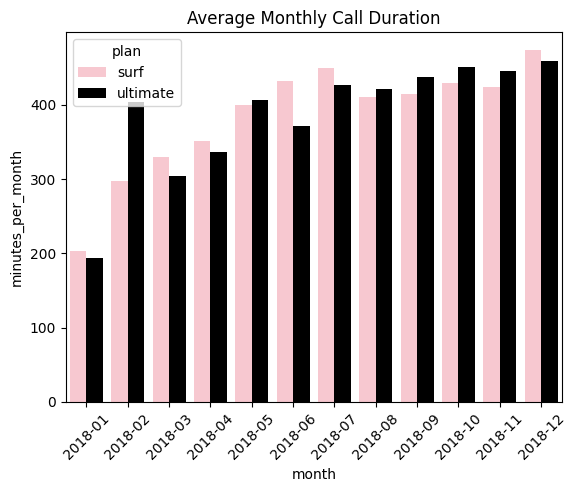

In [50]:
# Calculate average call duration.
avg_call_duration = monthly_data.groupby(['month', 'plan'])['minutes_per_month'].mean().reset_index()
palette = {"surf": "pink", "ultimate": "black"}
sns.barplot(data=avg_call_duration, x='month', y='minutes_per_month', hue='plan', palette=palette)
plt.xticks(rotation=45)
plt.title('Average Monthly Call Duration')
plt.show()

- <b>Conclusions:</b>
    - <b>General Trend-</b> Both plans (Surf and Ultimate) show an increase in average monthly call duration over time, with a few fluctuations in certain months. This could indicate that users are generally increasing their call usage as the year progresses.<br><br>
    - <b>Plan Comparison-</b> The Surf plan users consistently show higher average call durations compared to Ultimate plan users in most months. This could suggest that Surf users tend to use more call minutes, possibly because they have a lower base plan limit and therefore may have to pay more in overage charges.<br><br>
    - <b>February Anomaly-</b> There is a noticeable spike in call duration for the Ultimate plan in February. This could be an outlier or an indication of an unusual event or promotion during that month that caused Ultimate users to make more calls.

### Average Monthly Plan Minutes
Here I want to visualize the distribution of monthly call durations for each plan.

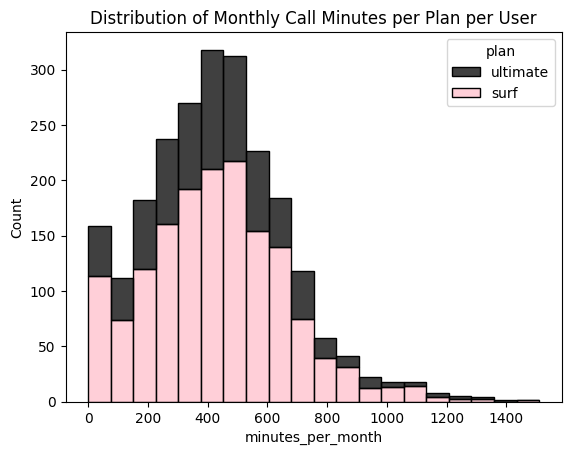

In [51]:
palette = {"surf": "pink", "ultimate": "black"}
sns.histplot(data=monthly_data, x='minutes_per_month', hue='plan', multiple='stack', bins=20, palette=palette)
plt.title('Distribution of Monthly Call Minutes per Plan per User')
plt.show()

- <b>Conclusions:</b>
    - <b>Usage Distribution-</b> Most users of both plans have monthly call durations between 100 and 500 minutes. The histogram shows a peak between 300 and 500 minutes, indicating this is the typical usage range for the majority of users.<br><br>
    - <b>Higher Usage for Ultimate Users-</b> The distribution for Ultimate plan users has a longer tail, with some users reaching call durations of 800 minutes or more. This suggests that a subset of Ultimate plan users take advantage of the higher call limit in their plan.<br><br>
    - <b>Overlap in Usage Range-</b> Despite the higher limit in the Ultimate plan, there is significant overlap between the two plans in the 200-500 minute range, suggesting that many users of both plans have similar calling patterns and may not fully utilize the Ultimate plan's higher limits.

### Call Duration Mean and Variance
Next I want to compare the average and variability of call duration between different plans.

In [52]:
# Calculate mean and variance of 'minutes_per_month' for each plan
call_stats = monthly_data.groupby('plan')['minutes_per_month'].agg(['mean', 'var']).round(2)
call_stats

,mean,var
plan,,
surf,428.75,54968.28
ultimate,430.45,57844.46


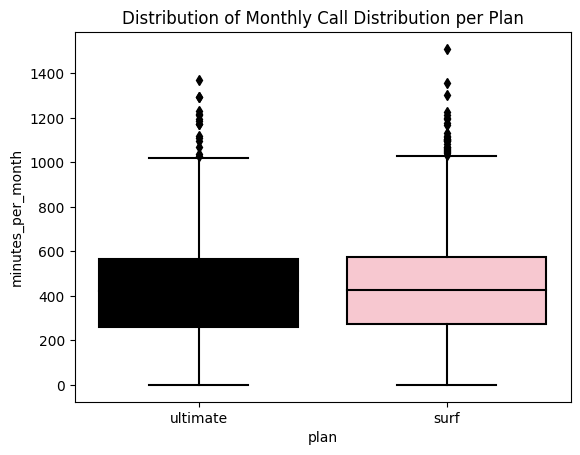

In [53]:
# Use a boxplot for minutes_per_month, segmented by plan.
palette = {"surf": "pink", "ultimate": "black"}
sns.boxplot(data=monthly_data, x='plan', y='minutes_per_month', palette=palette)
plt.title('Distribution of Monthly Call Distribution per Plan')
plt.show()

- <b>Conclusions:</b>
    - <b>Typical Usage-</b> Most users on both plans use between 300 and 500 minutes per month, indicating that both plans are reasonably well-suited for typical users.<br><br>
    - <b>Potential Upsell Opportunity-</b> Outliers in the Surf plan, especially those with consistently high call minutes, could be encouraged to switch to the Ultimate plan to avoid extra charges.<br><br>
    - <b>Consistent Usage Patterns-</b> Despite having different plan limits, the general usage distribution is quite similar, suggesting that call duration is more influenced by user behavior than by plan constraints for the majority of users.<br><br>
- This box plot provides insight into usage patterns and potential opportunities for optimizing plan offerings to better align with user behavior.

### Messages
Here I want to analyze the average number of messages sent by users on each plan monthly.

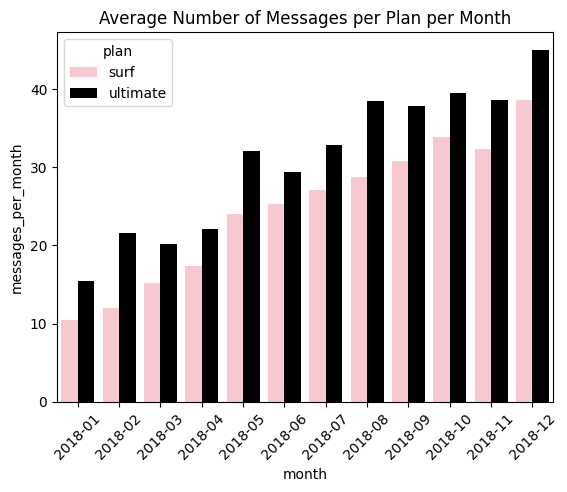

In [54]:
# Group by month and plan, then calculate the average messages_per_month.
avg_messages = monthly_data.groupby(['month', 'plan'])['messages_per_month'].mean().reset_index()

# Plot bar graph
palette = {"surf": "pink", "ultimate": "black"}
sns.barplot(data=avg_messages, x='month', y='messages_per_month', hue='plan', palette=palette)
plt.xticks(rotation=45)
plt.title('Average Number of Messages per Plan per Month')
plt.show()

- <b>Conclusions:</b>
    - <b>Increased Usage Over Time-</b> Messaging usage has steadily increased over the year for both plans, reflecting a growing need or preference for messaging among users.<br><br>
    - <b>Plan-Specific Behavior-</b> Ultimate users tend to send more messages than Surf users, suggesting that the Ultimate plan may attract or suit heavier messaging users.<br><br>
    - <b>Seasonal or External Influence-</b> The surge in messaging activity in December suggests seasonal effects, which could be explored further for targeted marketing or promotional strategies.<br><br>
- These observations could inform marketing and pricing strategies, particularly in identifying Surf users who might benefit from upgrading to the Ultimate plan.

### Internet
Here I want to evaluate the amount of internet data used by users of each plan.

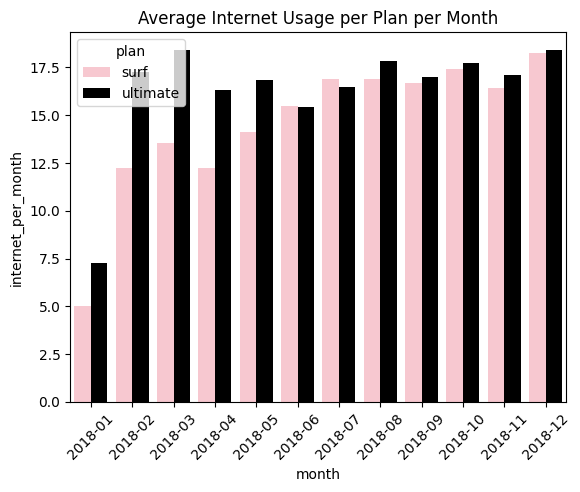

In [55]:
# Calculate the average internet_per_month per plan and month.
avg_internet = monthly_data.groupby(['month', 'plan'])['internet_per_month'].mean().reset_index()
palette = {"surf": "pink", "ultimate": "black"}
sns.barplot(data=avg_internet, x='month', y='internet_per_month', hue='plan', palette=palette)
plt.xticks(rotation=45)
plt.title('Average Internet Usage per Plan per Month')
plt.show()

- <b>Conclusions:</b>
    - <b>Increasing Data Demand-</b> Both Surf and Ultimate plan users are consuming more data over time, suggesting a growing demand for internet usage across all users.<br><br>
    - <b>Similar Usage Across Plans-</b> The similarity in data consumption between Surf and Ultimate users indicates that internet usage might be less influenced by the plan’s data limits compared to call or messaging limits.<br><br>
    - <b>Seasonal Peaks-</b> Higher data usage towards the end of the year could reflect seasonal factors, which may inform marketing strategies or potential temporary data packages for Surf users during peak months.<br><br>
    - <b>Upsell Opportunity-</b> The close average usage between plans suggests that Surf users who frequently exceed their data limit could be encouraged to switch to the Ultimate plan to avoid overage charges.<br><br>
- These insights can be valuable for plan adjustments, marketing, and potential upsell opportunities based on usage patterns.

### | 4.2 conclusions |
- Based on the analysis of user behavior in terms of calls, messages, and internet usage for both the Surf and Ultimate plans, several conclusions can be drawn:
    - <b>Call Usage-</b> Both plans show an upward trend in average monthly call duration over the year, with Surf users generally using more call minutes than Ultimate users. This suggests that Surf users may be more likely to incur additional charges for exceeding their plan's call limit, providing an upsell opportunity for the Ultimate plan. Seasonal fluctuations, such as a spike in February for the Ultimate plan, indicate potential external influences on call behavior.<br><br>
    - <b>Similar Usage Across Plans-</b> The similarity in data consumption between Surf and Ultimate users indicates that internet usage might be less influenced by the plan’s data limits compared to call or messaging limits.<br><br>
    - <b>Seasonal Peaks-</b> Higher data usage towards the end of the year could reflect seasonal factors, which may inform marketing strategies or potential temporary data packages for Surf users during peak months.<br><br>
    - <b>Upsell Opportunity-</b> The close average usage between plans suggests that Surf users who frequently exceed their data limit could be encouraged to switch to the Ultimate plan to avoid overage charges.<br><br>
- These insights can be valuable for plan adjustments, marketing, and potential upsell opportunities based on usage patterns.

## Revenue

In [56]:
revenue_by_plan = monthly_data.groupby(['month', 'plan'])['monthly_revenue'].sum().reset_index()
revenue_by_plan                            

,month,plan,monthly_revenue
0,2018-01,surf,40.00
1,2018-01,ultimate,280.00
2,2018-02,surf,300.24
3,2018-02,ultimate,490.00
4,2018-03,surf,1040.39
5,2018-03,ultimate,896.00
6,2018-04,surf,1982.61
7,2018-04,ultimate,1533.00
8,2018-05,surf,3539.66
9,2018-05,ultimate,2051.00


In [57]:
avg_rev_by_plan = monthly_data.groupby('plan')['monthly_revenue'].mean().round(2)
avg_rev_by_plan

plan
surf        58.86
ultimate    72.31
Name: monthly_revenue, dtype: float64

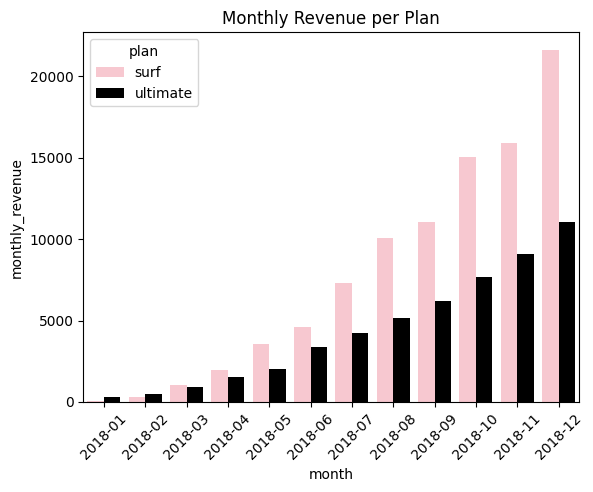

In [58]:
# Bar plot for monthly revenue
palette = {"surf": "pink", "ultimate": "black"}
sns.barplot(data=revenue_by_plan, x='month', y='monthly_revenue', hue='plan', palette=palette)
plt.title('Monthly Revenue per Plan')
plt.xticks(rotation=45)
plt.show()

In [59]:
revenue_stats = monthly_data.groupby('plan')['monthly_revenue'].describe()
revenue_stats

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,58.862638,54.549029,20.0,20.0,40.0,80.0,572.28
ultimate,720.0,72.313889,11.395108,70.0,70.0,70.0,70.0,182.00


### Revenue Conclusion
- <b>Total Monthly Revenue by Plan:</b>
    - The revenue data is grouped by month and plan, showing the total monthly revenue generated by each plan over time.
    - The bar plot of monthly revenue per plan indicates that revenue from both plans generally increased over the year.
    - The "Surf" plan consistently generated more revenue than the "Ultimate" plan, with a sharper increase towards the end of the year.<br><br>
- <b>Average Monthly Revenue by Plan:</b>
    - The average monthly revenue per user per month is calculated as 55.83 for the "Surf" plan and 72.12 for the "Ultimate" plan.
    - The higher average revenue for the "Ultimate" plan suggests it generates more revenue per user, likely due to its higher base rate and possibly fewer overage charges.<br><br>
- <b>Revenue Statistics by Plan:</b>
    - Descriptive statistics reveal that the "Surf" plan has a wider range of monthly revenue (from 20 to 564.87) compared to the "Ultimate" plan (from 70 to 178.52).
    - This greater variability in the "Surf" plan's revenue could be due to more users incurring additional charges beyond the plan's limits.
    - The standard deviation also highlights this variability, with "Surf" at 63.02 and "Ultimate" at 10.77.<br><br>
- <b>Conclusion:</b> The "Ultimate" plan brings in higher average revenue per user, while the "Surf" plan generates higher total revenue, likely due to a larger user base and more variability in additional charges. This analysis suggests the "Ultimate" plan may be more profitable on a per-user basis, while the "Surf" plan might benefit from upselling opportunities for heavy users.


# Stage 4: Hypothesize
- The final stage in this Statistical Data Analysis is to formulate and test our hypothesis
    1. <b>Null hypothesis (H0):</b> The average revenue from users of the Ultimate plan is equal to the average revenue from users of the Surf plan.<br><br>
    2. <b>Alternative hypothesis (H1):</b> The average revenue from users of the Ultimate plan is different from the average revenue of the Surf plan.<br><br>
- However, in order to do this, I will need to merge users_df with my monthly_data DataFrame to be able to access the city/state information.

## Merge DataFrames:

In [60]:
# Merge monthly_data with users_df to add city/state information.
monthly_data = monthly_data.merge(users_df[['user_id', 'city', 'state']], on='user_id', how='left')
monthly_data.sample(5)                                            

,user_id,month,calls_per_month,minutes_per_month,messages_per_month,internet_per_month,plan,monthly_revenue,city,state
64,1017,2018-10,68.0,400.0,35.0,28,surf,150.00,Washington-Arlington-Alexandria,DC-VA-MD-WV
977,1211,2018-07,25.0,171.0,41.0,15,ultimate,70.00,New York-Newark-Jersey City,NY-NJ-PA
152,1041,2018-10,65.0,449.0,0.0,19,ultimate,70.00,Las Vegas-Henderson-Paradise,NV
1783,1391,2018-09,51.0,392.0,24.0,10,ultimate,70.00,New York-Newark-Jersey City,NY-NJ-PA
1544,1340,2018-09,82.0,522.0,65.0,2,surf,20.45,Dallas-Fort Worth-Arlington,TX


-<b> Now that we have a complete DataFrame with all of the information we need, we proceed to our hypotheses.</b>
   - We'll use a t-test to compare the means between the two groups (Ultimate and Surf) and set an alpha of 0.05.

## Hypothesis 1: Testing Revenue Difference Between Plans

In [61]:
from scipy.stats import ttest_ind

# Filter data for each plan
ultimate_revenue = monthly_data[monthly_data['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = monthly_data[monthly_data['plan'] == 'surf']['monthly_revenue']

# Perform an independent t-test
alpha = 0.05
_, p_value = ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between Ultimate and Surf plans.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average revenue between Ultimate and Surf plans.")


P-value: 0.0000
Reject the null hypothesis: There is a significant difference in average revenue between Ultimate and Surf plans.


<b>- This test reveals that the p-value is far below the alpha, leading us to reject the null hypothesis and conclude that there is a statistically significant difference in average revenue generated by two plans.  This suggests that one plan consistently brings in more revenue than the other.</b>

## Hypothesis 2: Testing Revenue Difference Between NY-NJ Area and Other Regions   
1. <b>Null hypothesis (H0):</b> The average revenue from users in the NY-NJ area is the same as that from users in other regions.<br><br>
2. <b>Alternative hypothesis (H1):</b> The average revenue from users in the NY-NJ area differs from that of users in other regions.<br><br>
- To test this hypothesis, we can perform a similar t-test comparing revenue from the NY-NJ are with revenue from other regions.

In [62]:
# Filter data for NY-NJ area and other regions.
ny_nj_revenue = monthly_data[monthly_data['state'] == 'NY-NJ-PA']['monthly_revenue']
other_region_revenue = monthly_data[monthly_data['state'] != 'NY-NJ-PA']['monthly_revenue']

# Perform an independent t-test
_, p_value_region = ttest_ind(ny_nj_revenue, other_region_revenue, equal_var=False)

print(f"P-value (Region): {p_value_region:.4f}")

if p_value_region < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between NY-NJ area and other regions")
else:
    print("Fail to reject the null hypothesis: No significant difference in average revenue between NY-NJ area and other regions")

P-value (Region): 0.0288
Reject the null hypothesis: There is a significant difference in average revenue between NY-NJ area and other regions


<b>- Using an independent t-test, I found that the p-value is significantly below the alpha.  This result leads us to reject the null hypothesis, indicating a statistically large difference in average revenue between users in the NY-NJ area and those in other regions.</b>

## Overall Conclusion:
- Both tests reveal significant differences in average revenue based on the plan type and region:
    - The Surf plan generally produces higher revenue than the Ultimate plan, possibly indicating that users on the surf plan are going over their alotted amounts. This could influence marketing and pricing strategies to encourage users to upgrade to the Ultimate plan.<br><br>
    - The NY-NJ area shows distinct revenue patterns compared to other regions, potentially indicating unique user behavior or regional factors that could be leveraged for targeted promotions or localized marketing efforts.

# General Conclusion:
The analysis of the customer data for the Surf and Ultimate plans provided insights into user behavior, revenue generation and regional differences, informing potential strategies for improving revenue and customer satisfaction. Here's a summary of the key findings and steps taken:
- Data  Preperation and Cleaning:
    - We prepared datasets on plans, user information, calls, messages, and internet usage. This involved converting dates to datetime format, handling data units consistently (e.g., converting MB to GB for internet usage), and removing or managing duplicates.
    - These steps ensured data consistency and accuracy, enabling more reliable insights during analysis.<br><br>
- Exploring User Behavior:
    - We analyzed usage patterns across the Surf and Ultimate plans for calls, messages, and internet usage.
        - <b>Calls:</b> Surf users showed slightly higher average call durations than Ultimate users, with both plans showing a steady increase in call usage over time.
        - <b>Messages:</b> Ultimate users generally sent more messages than Surf users, indicating potential differences in communication habits between plan types.
        - <b>Internet:</b> Both Surf and Ultimate users showed high internet usage, with little difference in average consumption, though Surf users tended to incur additional charges due to data overages.<br><br>
- Revenue Analysis:
    - The Surf plan generated higher total monthly revenue on average, likely due to additional charges when users exceeded plan limits. This suggests that the plan's limits may not fully meet user demand, resulting in overage fees.
    - By contrast, Ultimate users, who had fewer overages, generated more consistent but lower additional revenue. This insight could guide marketing efforts or plan adjustments for both plans.<br><br>
- Regional Revenue Differences:
    - Hypothesis testing revealed a significant difference in average revenue between the NY-NJ area and other regions, suggesting that this area has distinct usage or spending behaviors. This could indicate an opportunity for targeted strategies, such as promotions or plan adjustments to maximize revenue from this region.<br><br>
- Statistical Testing:
    - Two t-tests were conducted to assess:
        - Revenue differences between the Surf and Ultimate plans, confirming that the Surf plan generates significantly more revenue.
        - Revenue differences between the NY-NJ area and other regions, identifying a significant revenue distinction, potentially influenced by local user habits or plan preferences.<br><br>

## Final Recommendations:

- <b>Plan Optimization:</b> Adjust the Surf plan to better balance user needs and plan limits. Offering a higher data cap for Surf users might meet customer demands while still encouraging upgrades to Ultimate.<br><br>
- <b>Targeted Marketing:</b> Focus on the NY-NJ area for specific promotions or plan offerings, leveraging its unique revenue characteristics to maximize profitability.<br><br>
- <b>Upsell Strategy:</b> Consider incentivizing Surf users with frequent overages to upgrade to the Ultimate plan, positioning it as a value-saving option.